# Feature engineering exploration on EHR data

In [1]:
import pandas as pd
import re
import numpy as np
import mxnet as mx
import nltk, gluonnlp
from mxnet import nd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
stop_words = set(stopwords.words('english')) 

nltk.download('punkt')

def cleanStr(text):
    # Remove leading/trailing whitespace
    text = text.lower().strip()
    # Remove extra space and tabs
    text = re.sub('\s+', ' ', text)
    # Remove HTML tags/markups
    text = re.compile('<.*?>').sub('', text)
    return text

[nltk_data] Downloading package punkt to /Users/yhna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Load data to pandas dataframe
df = pd.read_csv('Cardiovascular3.csv')
df.head(10)

,Notes,Description
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2-D M-Mode. Doppler.
1,1. The left ventricular cavity size and wall ...,2-D Echocardiogram
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",2-D Echocardiogram
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Echocardiogram and Doppler
4,"HISTORY OF PRESENT ILLNESS: , I was kindly ask...",Transesophageal Echocardiogram. A woman admi...
5,"REASON FOR EXAM: , Coronary artery bypass surg...",Coronary artery bypass surgery and aortic ste...
6,"PROCEDURE NOTE:, The patient was brought to t...",Transesophageal echocardiogram. The transes...
7,"CLINICAL INDICATIONS: , MRSA bacteremia, rule ...",Transesophageal echocardiogram. MRSA bacterem...
8,"INDICATION: , Aortic stenosis.,PROCEDURE: , Tr...",Transesophageal echocardiogram for aortic ste...
9,"REASON FOR EXAM: , Aortic valve replacement. ...",Transesophageal echocardiographic examination...


In [4]:
df['Description_clean'] = df.Description.apply(cleanStr)

In [5]:
notes = df.Notes.tolist()
descriptions = df.Description_clean.tolist()

## EDA

In [6]:
from collections import Counter
words = " ".join(df["Description_clean"]).split()
clean_words = [word for word in words if word not in stop_words]
Counter(clean_words).most_common(50)

[('left', 34),
 ('stress', 27),
 ('myocardial', 27),
 ('aortic', 24),
 ('normal', 24),
 ('patient', 23),
 ('echocardiogram', 22),
 ('chest', 22),
 ('perfusion', 21),
 ('atrial', 18),
 ('coronary', 18),
 ('transesophageal', 17),
 ('test', 15),
 ('nuclear', 15),
 ('artery', 14),
 ('study', 14),
 ('ventricular', 13),
 ('doppler', 12),
 ('valve', 12),
 ('scan.', 12),
 ('echocardiogram.', 10),
 ('dobutamine', 10),
 ('-', 10),
 ('heart', 10),
 ('history', 10),
 ('right', 9),
 ('fibrillation', 9),
 ('ventricle', 9),
 ('function.', 9),
 ('mitral', 9),
 ('pain.', 9),
 ('2-d', 8),
 ('stenosis.', 8),
 ('ejection', 8),
 ('adenosine', 8),
 ('mild', 8),
 ('cardiac', 7),
 ('exercise', 7),
 ('admitted', 6),
 ('performed', 6),
 ('hypertrophy', 6),
 ('echocardiographic', 6),
 ('report.', 6),
 ('pain,', 6),
 ('ischemia.', 6),
 ('wall', 6),
 ('ischemic', 6),
 ('myoview', 6),
 ('imaging', 6),
 ('test.', 6)]

In [7]:
items = ['echocardiogram', 'perfusion', 'doppler', 'transesophageal', 'pain', 'ejection']

In [8]:
for i in items:
    df[i] =df['Description_clean'].str.contains(i)

In [9]:
df

,Notes,Description,Description_clean,echocardiogram,perfusion,doppler,transesophageal,pain,ejection
0,"2-D M-MODE: , ,1. Left atrial enlargement wit...",2-D M-Mode. Doppler.,2-d m-mode. doppler.,False,False,True,False,False,False
1,1. The left ventricular cavity size and wall ...,2-D Echocardiogram,2-d echocardiogram,True,False,False,False,False,False
2,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",2-D Echocardiogram,2-d echocardiogram,True,False,False,False,False,False
3,"DESCRIPTION:,1. Normal cardiac chambers size....",Echocardiogram and Doppler,echocardiogram and doppler,True,False,True,False,False,False
4,"HISTORY OF PRESENT ILLNESS: , I was kindly ask...",Transesophageal Echocardiogram. A woman admi...,transesophageal echocardiogram. a woman admitt...,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
99,"TITLE OF PROCEDURE: ,Coronary artery bypass g...",Coronary artery bypass grafting times three u...,coronary artery bypass grafting times three ut...,False,False,False,False,False,False
100,"PREOPERATIVE DIAGNOSIS: , Coronary occlusive d...",Coronary bypass graft x2 utilizing left inter...,coronary bypass graft x2 utilizing left intern...,False,False,False,False,False,False
101,"SUBJECTIVE: , The patient states that she feel...",Atrial fibrillation with rapid ventricular re...,atrial fibrillation with rapid ventricular res...,False,False,False,False,False,False
102,"DIAGNOSIS: , Aortic valve stenosis with corona...",Aortic valve replacement using a mechanical v...,aortic valve replacement using a mechanical va...,False,False,False,False,False,False


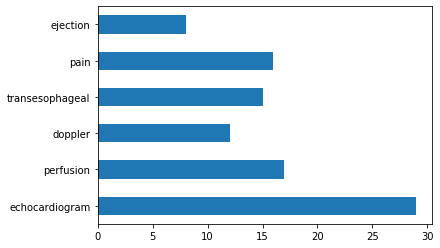

In [18]:
df.iloc[:, 3:].sum().plot.barh(x='count')

## Explore general NER 
Without lablled data, I am calling an universal Named Entity Recognizer (NER) using SpaCy as the very first step to extract information in this section. 

In [12]:
# Install SpaCy
!pip install spacy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [13]:
import spacy 

nlp = spacy.load('en_core_web_sm') 

In [14]:
# Print out extracted entities
entities = []

for i in range(len(notes)):
    doc = nlp(notes[i]) 
    for ent in doc.ents: 
        print(ent.text, 
#               ent.start_char, 
#               ent.end_char, 
              ent.label_) 
    print("\n--------------------\n")
    if ent: entities.append(ent)
    else: entities.append([])

2-D M-MODE: PERSON
1 DATE
4.7 cm QUANTITY
Normal LV PRODUCT
51%.,4 CARDINAL
Normal LV PRODUCT
36 CARDINAL
mmHg ORG
1 CARDINAL
Mild GPE

--------------------

1 CARDINAL
70% to 75% PERCENT
Doppler ORG
1.3 cm square QUANTITY
34 CARDINAL
19 mm QUANTITY
49 CARDINAL
mmHg ORG
10 CARDINAL
mmHg ORG
Doppler ORG

--------------------

ECHOCARDIOGRAM ORG
Cardiac NORP
Doppler PERSON

--------------------

Normal LV PRODUCT
Tricuspid GPE
,DOPPLER:,1 PERSON
Normal LV PRODUCT
around 60% PERCENT

--------------------

A PERSON
72-year-old DATE
MCA ORG
CVA ORG
20 CARDINAL
4 mg of Versed CARDINAL
100 micrograms QUANTITY
60% PERCENT
Mild ORG
four CARDINAL
Doppler ORG
1.83 cm QUANTITY
two CARDINAL
Four CARDINAL
three CARDINAL
transthoracic GPE
January 5, 2010 DATE
RVSP ORG
40 CARDINAL
0.95 m/ MONEY
232 CARDINAL
aorta GPE
1.19 cm QUANTITY
2.54 cm QUANTITY
2.61 cm QUANTITY
SVC ORG
Normal PERSON
Left LAW
60% PERCENT
Mild ORG
two CARDINAL
Mild ORG
transthoracic NORP
Internal Medicine ORG

--------------------

From the above results, it is noticed that a universal NER model cannot accurately extract useful entites from clinical notes. It is recommended to do the following steps:
* __Parse medical notes to the correct schema:__ e.g. REASON FOR EXAM, INDICATION etc.
* __Define a list of named enities of interest:__ e.g. patient age, medication, exam name, etc.
* __Label enough data points for training.__
* __Train a custom NER model:__ in order to extract the desired information.

## Word Embedding feature engineering
In the section, I built a feature engineering pipeline.
I applied the following processes here:
* __Text cleaning:__ Simple text cleaning operations. I did not do stemming or lemmatization as the word vectors already cover different forms of words. I use GloVe word embeddings for 6 billion words, phrases or punctuations in this example.
* __Tokenization:__ Tokenizing all sentences
* __Creating vocabulary:__ I created a vocabulary of the tokens. In this vocabulary, tokens will map to unique ids, such as "normal"->15, "heart"->30, etc.
* __Transforming text:__ Tokenized sentences will be mapped to unique ids. 

In [25]:
def tokenize(text):
    tokens = []
    text = cleanStr(text)
    words = word_tokenize(text)
    for word in words:
        tokens.append(word)
    return tokens

def createVocabulary(text_list, min_freq):
    all_tokens = []
    for sentence in text_list:
        all_tokens += tokenize(sentence)
    # Calculate token frequencies
    counter = gluonnlp.data.count_tokens(all_tokens)
    # Create the vocabulary
    vocab = gluonnlp.Vocab(counter,
                           min_freq = min_freq,
                           unknown_token = '<unk>',
                           padding_token = None,
                           bos_token = None,
                           eos_token = None)
    
    return vocab

def transformText(text, vocab, max_length):
    token_arr = np.zeros((max_length,))
    tokens = tokenize(text)[0:max_length]
    for idx, token in enumerate(tokens):
        try:
            # Use the vocabulary index of the token
            token_arr[idx] = vocab.token_to_idx[token]
        except:
            token_arr[idx] = 0 # Unknown word
    return token_arr

[nltk_data] Downloading package punkt to /Users/yhna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
min_freq = 3 # Include words appear at least 3 times
max_length = 300

print("Creating the vocabulary")
vocab = createVocabulary(notes, min_freq)
print("Transforming training texts")
notes_transformed = nd.array([transformText(text, vocab, max_length) for text in notes])

Creating the vocabulary
Transforming training texts


In [13]:
print("Vocabulary index for normal:", vocab['normal'])
print("Vocabulary index for heart:", vocab['heart'])

Vocabulary index for normal: 15
Vocabulary index for heart: 30


### Pre-trained GloVe Word Embeddings

I use GloVe word vectors. `'glove.6B.50d.txt'` file gives us 6 billion words/phrases vectors. Each word vector has 50 numbers in it. The following code shows how to get the word vectors and create an embedding matrix from them. I will connect our vocabulary indexes to the GloVe embedding with the `get_vecs_by_tokens()` function.

In [14]:
from mxnet.contrib import text
glove = text.embedding.create('glove',
                              pretrained_file_name = 'glove.6B.50d.txt')
embedding_matrix = glove.get_vecs_by_tokens(vocab.idx_to_token)

In [15]:
embedding_matrix


[[ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.013441  0.23682  -0.16899  ... -0.56657   0.044691  0.30392 ]
 [ 0.15164   0.30177  -0.16763  ... -0.35652   0.016413  0.10216 ]
 ...
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [-0.24344  -0.60601   0.33112  ...  0.92281   0.38199   0.47039 ]
 [ 0.6935   -0.13892  -0.10862  ...  0.54255  -0.20916   0.14965 ]]
<NDArray 1503x50 @cpu(0)>

### Next step
1. Once obtained labeled data, the embedding matrix can be used as input for sentiment analysis, or classification model.
2. BioBert or other Bert family model trained specific on medical data can be used for embedding as well.